In [5]:
# Colab library to upload files to notebook
from google.colab import files
import os, sys
# Install Kaggle library
!pip install -q kaggle

In [6]:
os.chdir('/root/.kaggle')

In [7]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
!kaggle datasets download -d tongpython/cat-and-dog

 99% 215M/218M [00:09<00:00, 17.0MB/s]
100% 218M/218M [00:09<00:00, 23.7MB/s]


In [9]:
import os, sys
import tensorflow as tf
os.listdir()

['kaggle.json', 'cat-and-dog.zip']

In [10]:
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/training_set/cats/cat.3719.jpg  
  infl

In [11]:
os.getcwd()

'/root/.kaggle'

In [12]:
os.listdir()

['kaggle.json', 'cat-and-dog.zip', 'test_set', 'training_set']

In [13]:
os.chdir('/root/.kaggle/training_set/training_set')

In [14]:
os.listdir()

['dogs', 'cats']

In [15]:
train_dir = '/root/.kaggle/training_set/training_set'
test_dir = '/root/.kaggle/test_set/test_set'
default_dir = '/root/.kaggle'

train_cat, train_dog, test_cat, test_dog = [], [],[],[]
def get_data():
    os.chdir(default_dir)
    # get data's on training cat
    current_dir = train_dir+'/cats'
    os.chdir(current_dir)
    train_data_cat = os.listdir()
    train_cat.extend(train_data_cat)
    
    # get data's on training dog
    current_dir = train_dir +'/dogs'
    os.chdir(current_dir)
    train_data_dog = os.listdir()
    train_dog.extend(train_data_dog)
    
    # get data's on test cat
    current_dir = test_dir+'/cats'
    os.chdir(current_dir)
    test_data_cat = os.listdir()
    test_cat.extend(test_data_cat)
    
    # get data's on test dog
    current_dir = test_dir +'/dogs'
    os.chdir(current_dir)
    test_data_dog = os.listdir()
    os.chdir(default_dir)
    test_dog.extend(test_data_dog)
    return

get_data()

In [16]:
print('Number of cats in our train data is: ', len(train_cat))
print('Number of dog in our train data is: ', len(train_dog))
print('Number of cats in our test data is: ', len(test_cat))
print('Number of dogs in our test data is: ', len(test_dog))
print('Total training data is: ', len(train_cat)+len(train_dog))
print('Total test data is: ', len(test_cat)+len(test_dog))


Number of cats in our train data is:  4001
Number of dog in our train data is:  4006
Number of cats in our test data is:  1012
Number of dogs in our test data is:  1013
Total training data is:  8007
Total test data is:  2025


In [17]:
import numpy as np
np.random.seed(100)

import keras
from keras.preprocessing import image

train_images = []
train_target = []
test_images = []
test_target = []


for i in train_cat:
    try:
        directory = train_dir + '/cats/' + i
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        os.chdir(default_dir)
        train_target.append(0)
    except OSError as err:
        continue

for i in train_dog:
    try:
        directory = train_dir + '/dogs/' + i
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        train_images.append(img)
        os.chdir(default_dir)
        train_target.append(1)
    
    except OSError as err:
        continue
    


Using TensorFlow backend.


In [18]:
for i in test_cat:
    try:
        directory = test_dir + '/cats/' + i
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        test_images.append(img)
        os.chdir(default_dir)
        test_target.append(0)
    except OSError as err:
        continue

for i in test_dog:
    try:
        directory = test_dir + '/dogs/' + i
        img = image.load_img(directory, target_size = (224,224), grayscale = False)
        img=image.img_to_array(img)
        img = img/255
        test_images.append(img)
        os.chdir(default_dir)
        test_target.append(1)
    
    except OSError as err:
        pass
    

In [19]:
train_images = np.array(train_images)
test_images = np.array(test_images)
train_target = np.array(train_target)
test_target = np.array(test_target)
train_images.shape, test_images.shape, train_target.shape, test_target.shape

((8005, 224, 224, 3), (2023, 224, 224, 3), (8005,), (2023,))

In [20]:
import tensorflow as tf

from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (7,7), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 105, 105, 16)      12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 52, 52, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 51, 8)         520       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_target, epochs=10, 
                    validation_data=(test_images, test_target))


Epoch 1/10


KeyboardInterrupt: ignored

64/64 - 3s - loss: 0.6134 - accuracy: 0.6906


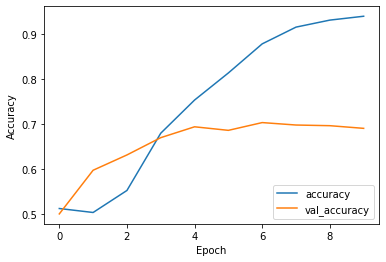

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_target, verbose=2)


In [ ]:
print(test_acc)

0.6905585527420044


# data image generators

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [24]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


In [25]:
batch_size = 100
target_size = (224,224)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=target_size,
                                                           class_mode='binary')


Found 8005 images belonging to 2 classes.


In [26]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=target_size,
                                                              class_mode='binary')


Found 2023 images belonging to 2 classes.


# visualize training image

In [24]:
sample_training_images, _ = next(train_data_gen)


In [25]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


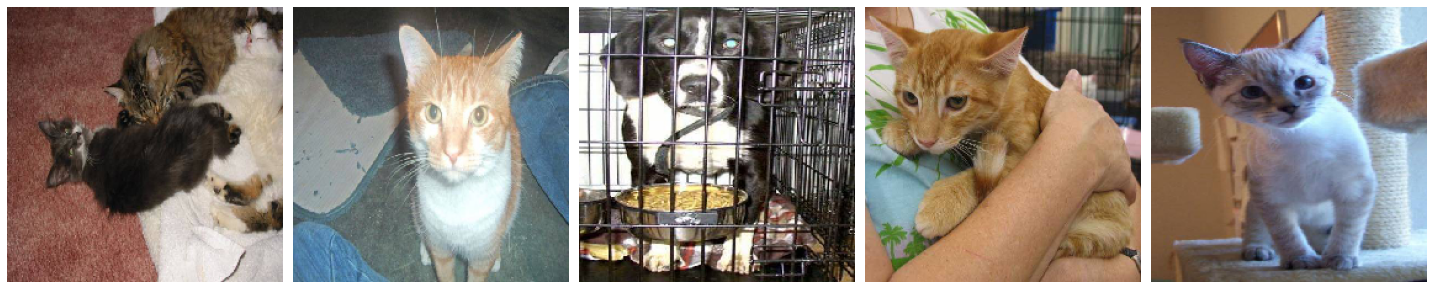

In [26]:
plotImages(sample_training_images[:5])


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (7,7), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 105, 105, 16)      12816     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 52, 52, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 51, 51, 8)         520       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)             

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=8005// batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=2023// batch_size
)


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Augumentation

### applying horizontal flip

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=target_size)



Found 8005 images belonging to 2 classes.


### take one sample of the image and repeat augumentation 5 times

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]


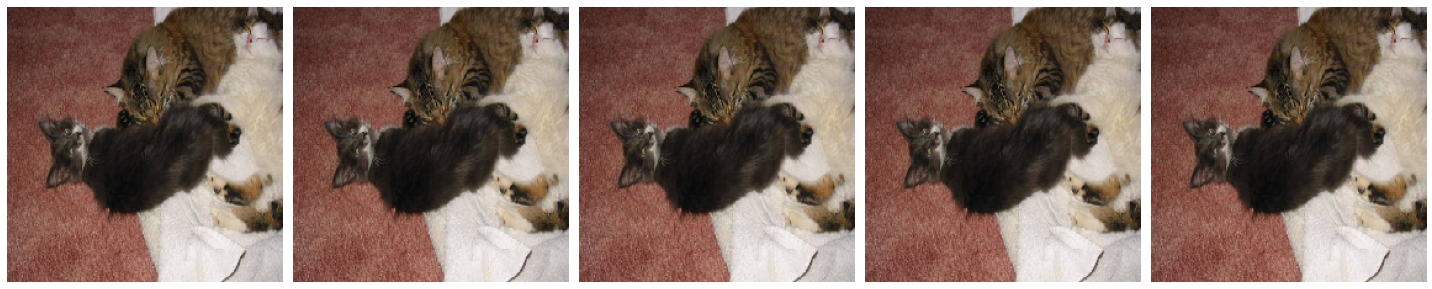

In [ ]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)


### randomly rotate the image

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)


In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=target_size)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


In [ ]:
plotImages(augmented_images)


# apply zoom augumentation

In [ ]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 


In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=target_size)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


In [ ]:
plotImages(augmented_images)


# putting it all together

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=target_size,
                                                     class_mode='binary')


Found 8005 images belonging to 2 classes.


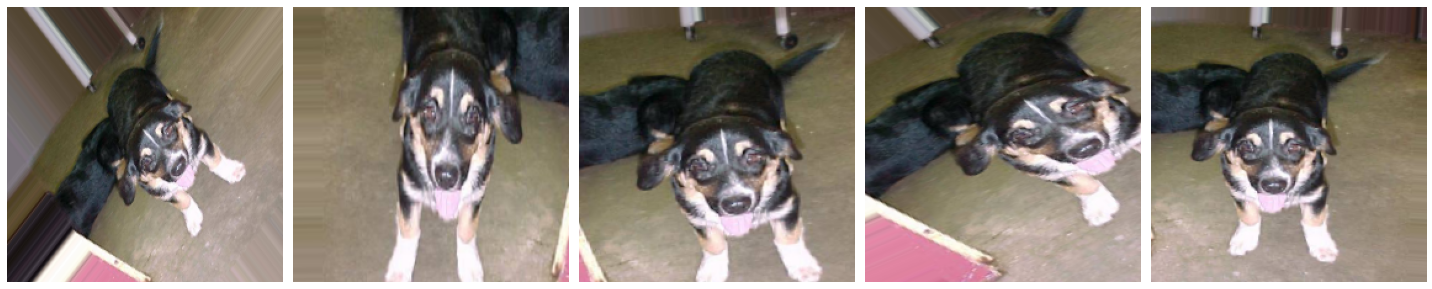

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


# create validator data generator

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)


In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=test_dir,
                                                 target_size=target_size,
                                                 class_mode='binary')


Found 2023 images belonging to 2 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (7,7), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 105, 105, 16)      12816     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 52, 52, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 51, 51, 8)         520       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)             

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=8005// batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=2023// batch_size
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
80/80 [==============================] - 114s 1s/step - loss: 0.6952 - accuracy: 0.5118 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
80/80 [==============================] - 114s 1s/step - loss: 0.6919 - accuracy: 0.5275 - val_loss: 0.6865 - val_accuracy: 0.5375
Epoch 3/10
80/80 [==============================] - 114s 1s/step - loss: 0.6906 - accuracy: 0.5270 - val_loss: 0.6941 - val_accuracy: 0.4980
Epoch 4/10
80/80 [==============================] - 114s 1s/step - loss: 0.6926 - accuracy: 0.5160 - val_loss: 0.6876 - val_accuracy: 0.5755
Epoch 5/10
80/80 [==============================] - 115s 1s/step - loss: 0.6779 - accuracy: 0.5819 - val_loss: 0.6760 - val_accuracy: 0.5835
Epoch 6/10
80/80 [==============================] - 115s 1s/step - loss: 0.6693 - accuracy: 0.5913 - val_loss: 0.6608 - val_accuracy: 0.6055
Epoch 7/10
80/80 [==============================] - 115s 1s/step - loss: 0.660

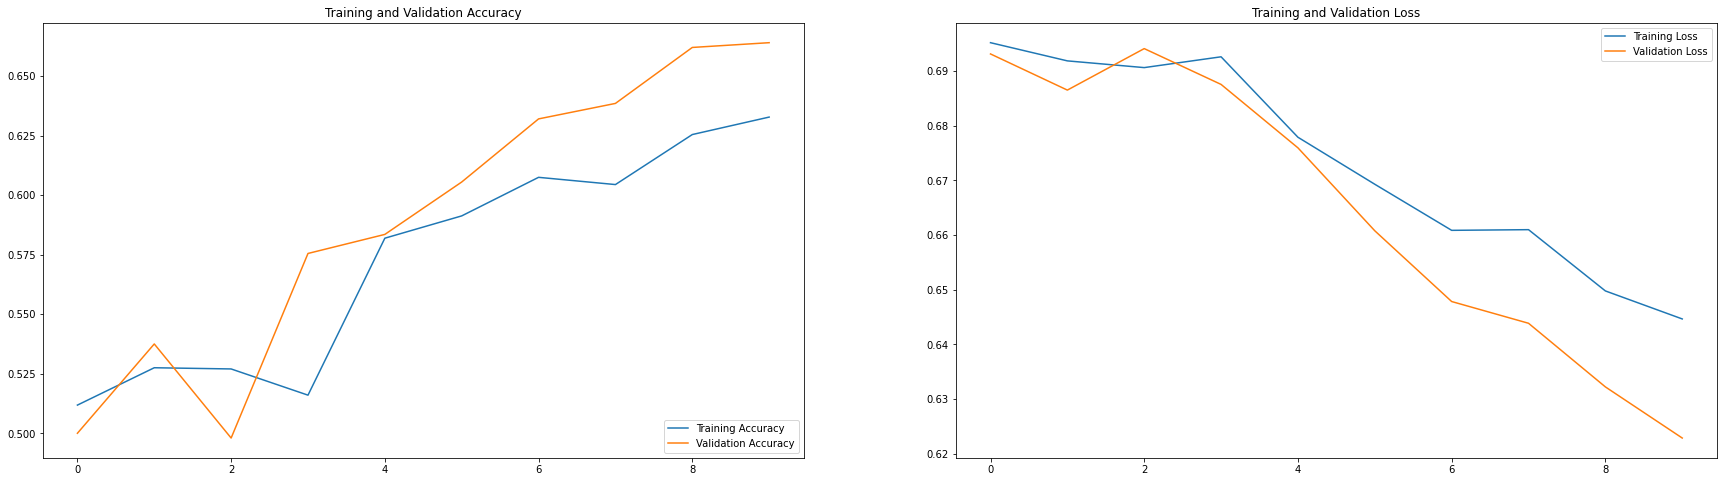

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# **Early stopping**

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (7,7), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 105, 105, 16)      12816     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 52, 52, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 51, 51, 8)         520       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 25, 25, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5000)             

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
#from tensorflow.keras import EarlyStopping
earlystop_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss', min_delta=0.01,mode = 'min',
  patience=5,verbose = 0, restore_best_weights = True)

epochs = 50
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=8005// batch_size,
    epochs=epochs,callbacks = [earlystop_callback],
    validation_data=val_data_gen,
    validation_steps=2023// batch_size
)


Epoch 1/50
80/80 [==============================] - 101s 1s/step - loss: 0.6936 - accuracy: 0.5217 - val_loss: 0.6849 - val_accuracy: 0.5195
Epoch 2/50
80/80 [==============================] - 98s 1s/step - loss: 0.6899 - accuracy: 0.5390 - val_loss: 0.6977 - val_accuracy: 0.4985
Epoch 3/50
80/80 [==============================] - 98s 1s/step - loss: 0.6876 - accuracy: 0.5538 - val_loss: 0.6798 - val_accuracy: 0.5695
Epoch 4/50
80/80 [==============================] - 98s 1s/step - loss: 0.6687 - accuracy: 0.5997 - val_loss: 0.6635 - val_accuracy: 0.5980
Epoch 5/50
80/80 [==============================] - 98s 1s/step - loss: 0.6621 - accuracy: 0.6020 - val_loss: 0.6987 - val_accuracy: 0.5445
Epoch 6/50
80/80 [==============================] - 98s 1s/step - loss: 0.6642 - accuracy: 0.6034 - val_loss: 0.6400 - val_accuracy: 0.6355
Epoch 7/50
80/80 [==============================] - 98s 1s/step - loss: 0.6514 - accuracy: 0.6217 - val_loss: 0.6368 - val_accuracy: 0.6375
Epoch 8/50
80/80 [=

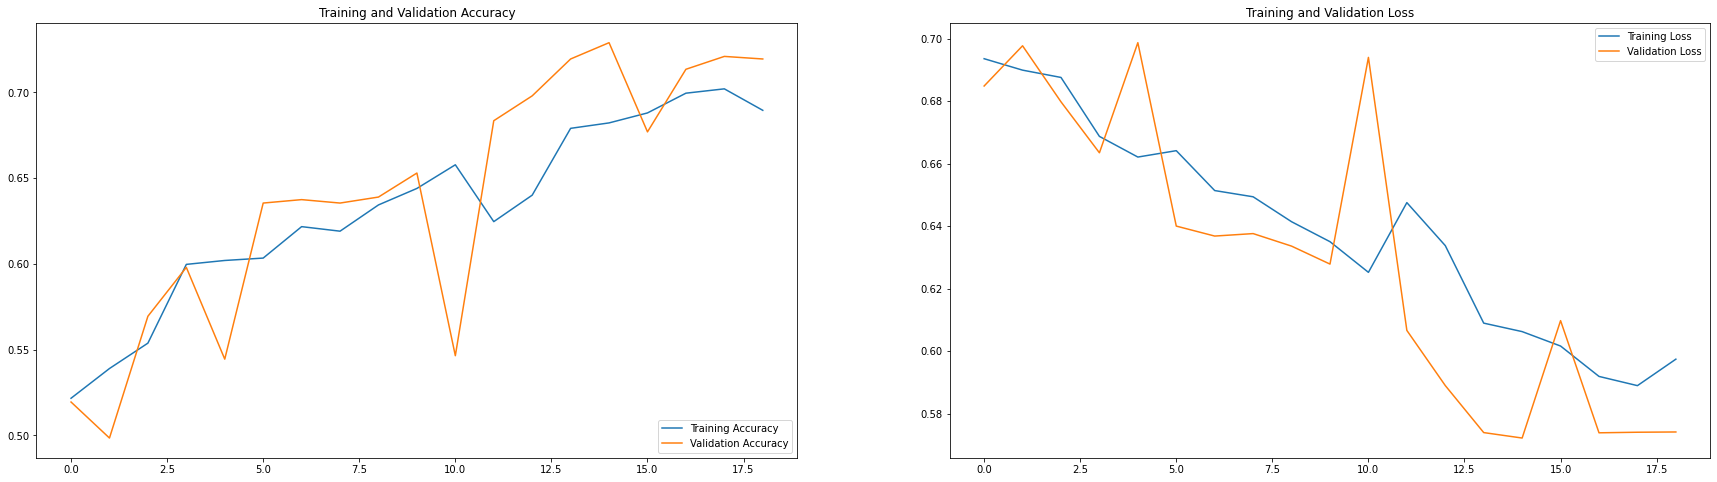

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(19)

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# regularizer- l1 and l2

### l1 regularizer

In [49]:
model = models.Sequential()
model.add(layers.Conv2D(32, (7,7), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu', bias_regularizer=keras.regularizers.l1(l=0.01)))
model.add(layers.Dense(100, activation='relu', bias_regularizer=keras.regularizers.l1(l=0.01)))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 105, 105, 16)      12816     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 52, 52, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 51, 51, 8)         520       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 25, 25, 8)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5000)             

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 20
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=8005// batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=2023// batch_size
)


Epoch 1/20
80/80 [==============================] - 102s 1s/step - loss: 0.6950 - accuracy: 0.5108 - val_loss: 0.6916 - val_accuracy: 0.5480
Epoch 2/20
80/80 [==============================] - 99s 1s/step - loss: 0.6906 - accuracy: 0.5314 - val_loss: 0.6844 - val_accuracy: 0.5700
Epoch 3/20
80/80 [==============================] - 99s 1s/step - loss: 0.6866 - accuracy: 0.5432 - val_loss: 0.6774 - val_accuracy: 0.5870
Epoch 4/20
80/80 [==============================] - 100s 1s/step - loss: 0.6814 - accuracy: 0.5622 - val_loss: 0.6836 - val_accuracy: 0.5400
Epoch 5/20
80/80 [==============================] - 99s 1s/step - loss: 0.6704 - accuracy: 0.5915 - val_loss: 0.6459 - val_accuracy: 0.6390
Epoch 6/20
80/80 [==============================] - 99s 1s/step - loss: 0.6737 - accuracy: 0.5871 - val_loss: 0.6569 - val_accuracy: 0.6205
Epoch 7/20
80/80 [==============================] - 99s 1s/step - loss: 0.6629 - accuracy: 0.6047 - val_loss: 0.6391 - val_accuracy: 0.6490
Epoch 8/20
80/80 [

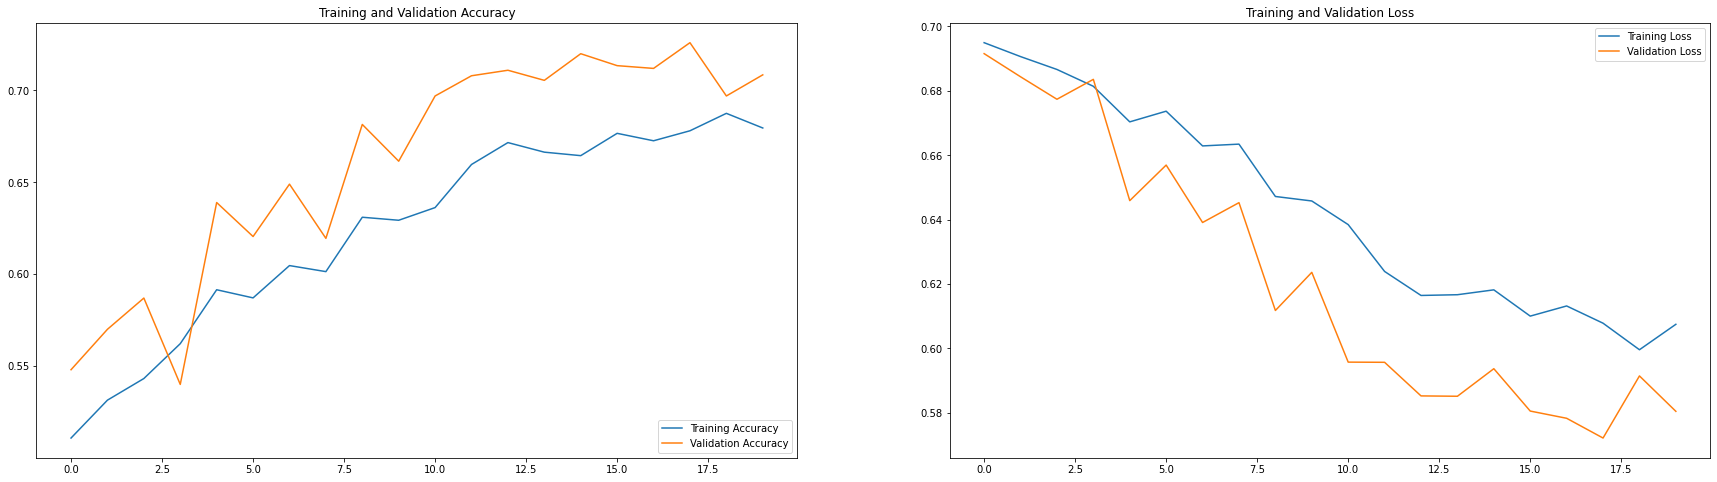

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### l2 regularizer

In [55]:
model = models.Sequential()
model.add(layers.Conv2D(32, (7,7), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu',bias_regularizer=keras.regularizers.l2(l=0.001)))
model.add(layers.Dense(100, activation='relu',bias_regularizer=keras.regularizers.l2(l=0.001)))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 105, 105, 16)      12816     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 52, 52, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 51, 51, 8)         520       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 25, 25, 8)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 5000)             

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 20
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=8005// batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=2023// batch_size
)


Epoch 1/20
80/80 [==============================] - 101s 1s/step - loss: 0.6938 - accuracy: 0.5094 - val_loss: 0.6873 - val_accuracy: 0.5325
Epoch 2/20
80/80 [==============================] - 101s 1s/step - loss: 0.6866 - accuracy: 0.5538 - val_loss: 0.6800 - val_accuracy: 0.5890
Epoch 3/20
80/80 [==============================] - 101s 1s/step - loss: 0.6807 - accuracy: 0.5746 - val_loss: 0.6681 - val_accuracy: 0.6065
Epoch 4/20
80/80 [==============================] - 103s 1s/step - loss: 0.6704 - accuracy: 0.5972 - val_loss: 0.6497 - val_accuracy: 0.6405
Epoch 5/20
80/80 [==============================] - 103s 1s/step - loss: 0.6566 - accuracy: 0.6168 - val_loss: 0.6653 - val_accuracy: 0.5945
Epoch 6/20
80/80 [==============================] - 102s 1s/step - loss: 0.6356 - accuracy: 0.6512 - val_loss: 0.6234 - val_accuracy: 0.6640
Epoch 7/20
80/80 [==============================] - 104s 1s/step - loss: 0.6348 - accuracy: 0.6453 - val_loss: 0.6253 - val_accuracy: 0.6620
Epoch 8/20
80

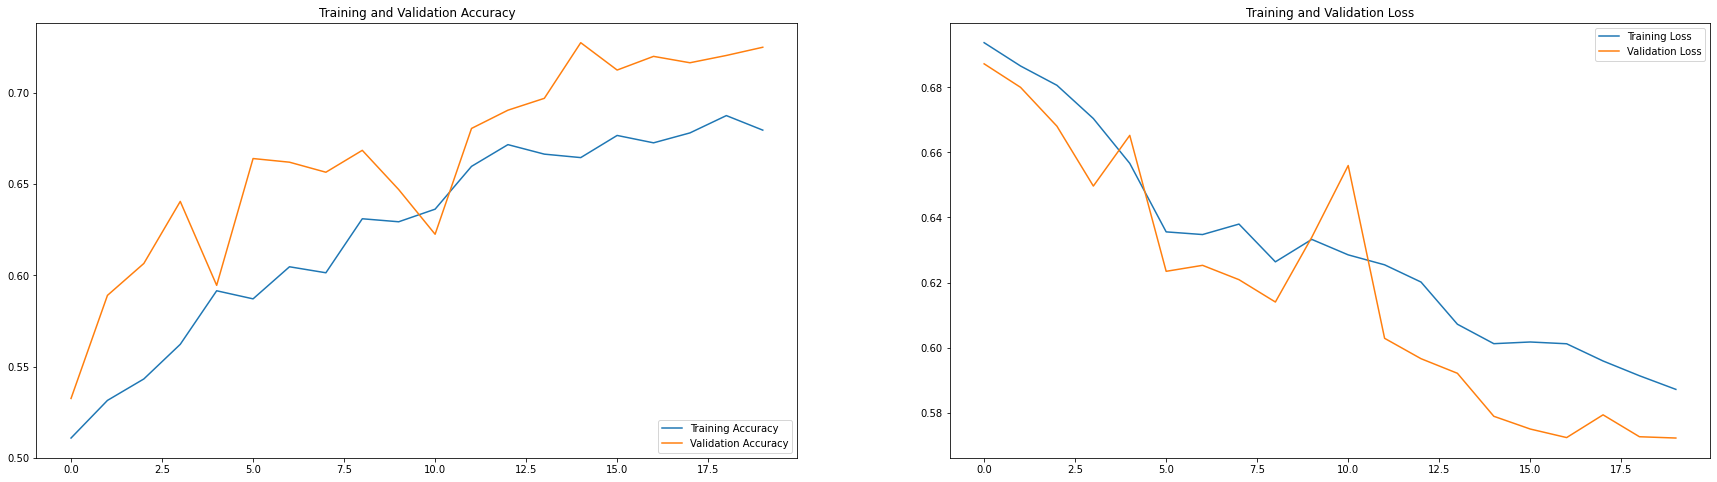

In [57]:
facc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# **l1-l2 regularizer**

In [69]:

model = models.Sequential()
model.add(layers.Conv2D(32, (7,7), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu', bias_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.001)))
model.add(layers.Dense(100, activation='relu', bias_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.001)))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 105, 105, 16)      12816     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 52, 52, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 51, 51, 8)         520       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 25, 25, 8)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 5000)            

In [67]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [68]:
epochs = 20
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=8005// batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=2023// batch_size
)


Epoch 1/20
80/80 [==============================] - 98s 1s/step - loss: 0.6976 - accuracy: 0.5077 - val_loss: 0.6937 - val_accuracy: 0.4985
Epoch 2/20
80/80 [==============================] - 98s 1s/step - loss: 0.6905 - accuracy: 0.5175 - val_loss: 0.6809 - val_accuracy: 0.5735
Epoch 3/20
80/80 [==============================] - 98s 1s/step - loss: 0.6815 - accuracy: 0.5669 - val_loss: 0.6669 - val_accuracy: 0.6055
Epoch 4/20
80/80 [==============================] - 97s 1s/step - loss: 0.6672 - accuracy: 0.5970 - val_loss: 0.6383 - val_accuracy: 0.6435
Epoch 5/20
80/80 [==============================] - 97s 1s/step - loss: 0.6637 - accuracy: 0.6070 - val_loss: 0.6423 - val_accuracy: 0.6395
Epoch 6/20
80/80 [==============================] - 97s 1s/step - loss: 0.6519 - accuracy: 0.6188 - val_loss: 0.6282 - val_accuracy: 0.6540
Epoch 7/20
80/80 [==============================] - 97s 1s/step - loss: 0.6561 - accuracy: 0.6164 - val_loss: 0.6219 - val_accuracy: 0.6620
Epoch 8/20
80/80 [==

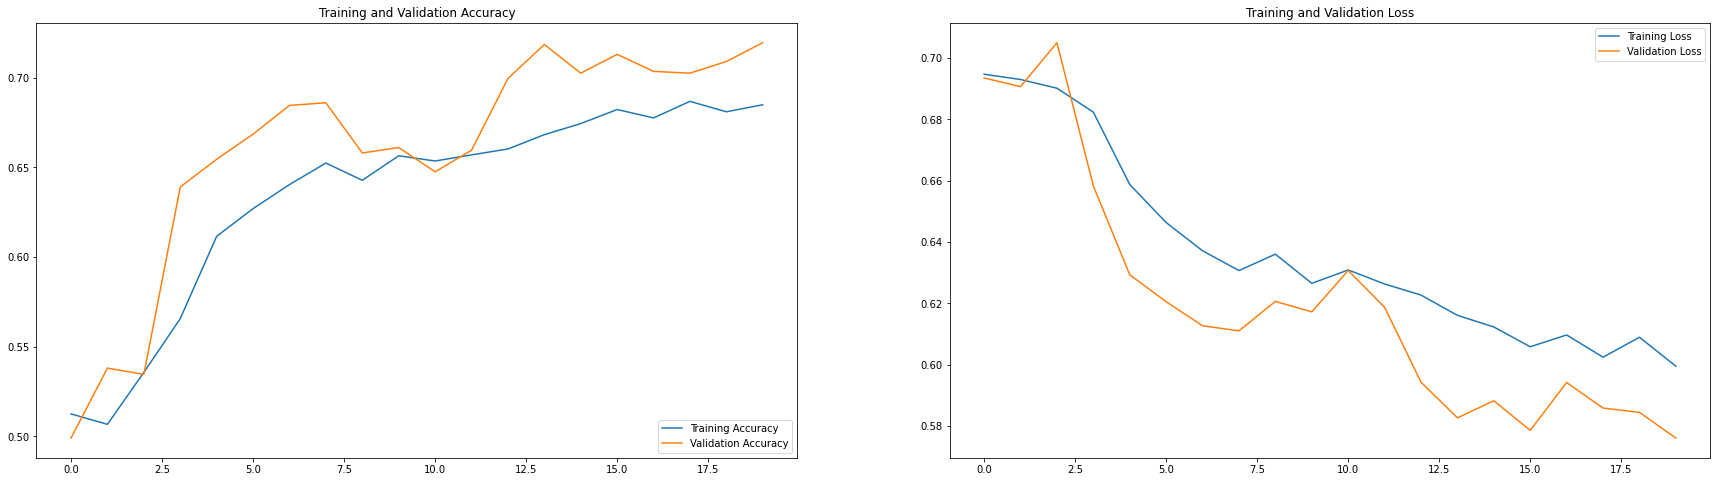

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## **dropout regularization**

In [71]:

model = models.Sequential()
model.add(layers.Conv2D(32, (7,7), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 105, 105, 16)      12816     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 52, 52, 16)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 51, 51, 8)         520       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 25, 25, 8)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 5000)            

In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
epochs = 20
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=8005// batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=2023// batch_size
)


Epoch 1/20
80/80 [==============================] - 99s 1s/step - loss: 0.6948 - accuracy: 0.5125 - val_loss: 0.6935 - val_accuracy: 0.4990
Epoch 2/20
80/80 [==============================] - 97s 1s/step - loss: 0.6930 - accuracy: 0.5066 - val_loss: 0.6907 - val_accuracy: 0.5380
Epoch 3/20
80/80 [==============================] - 97s 1s/step - loss: 0.6902 - accuracy: 0.5356 - val_loss: 0.7051 - val_accuracy: 0.5345
Epoch 4/20
80/80 [==============================] - 97s 1s/step - loss: 0.6824 - accuracy: 0.5656 - val_loss: 0.6583 - val_accuracy: 0.6390
Epoch 5/20
80/80 [==============================] - 97s 1s/step - loss: 0.6588 - accuracy: 0.6115 - val_loss: 0.6293 - val_accuracy: 0.6545
Epoch 6/20
80/80 [==============================] - 96s 1s/step - loss: 0.6464 - accuracy: 0.6269 - val_loss: 0.6205 - val_accuracy: 0.6685
Epoch 7/20
80/80 [==============================] - 97s 1s/step - loss: 0.6371 - accuracy: 0.6404 - val_loss: 0.6127 - val_accuracy: 0.6845
Epoch 8/20
80/80 [==

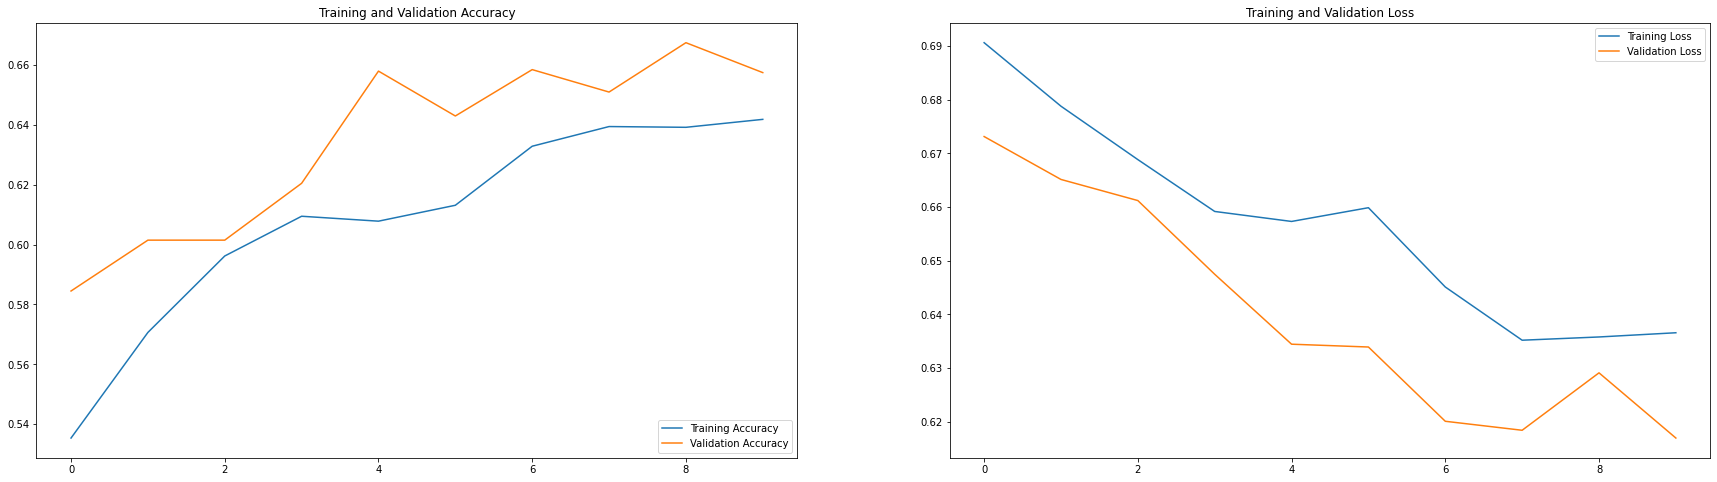

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


#### putting all regularization technique together

In [75]:
# Data augumentation
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.3
                    )
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=target_size,
                                                     class_mode='binary')
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=test_dir,
                                                 target_size=target_size,
                                                 class_mode='binary')

# with drop out


model = models.Sequential()
model.add(layers.Conv2D(32, (7,7), activation='relu', input_shape=(224,224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu', bias_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.001)))
model.add(Dropout(0.2))
model.add(layers.Dense(100, activation='relu', bias_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.001)))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#from tensorflow.keras import EarlyStopping
earlystop_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss', min_delta=0.01,mode = 'min',
  patience=5,verbose = 0, restore_best_weights = True)

epochs = 50
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=8005// batch_size,
    epochs=epochs,callbacks = [earlystop_callback],
    validation_data=val_data_gen,
    validation_steps=2023// batch_size
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 105, 105, 16)      12816     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 52, 52, 16)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 51, 51, 8)         520       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 25, 25, 8)         0         
___________________________________

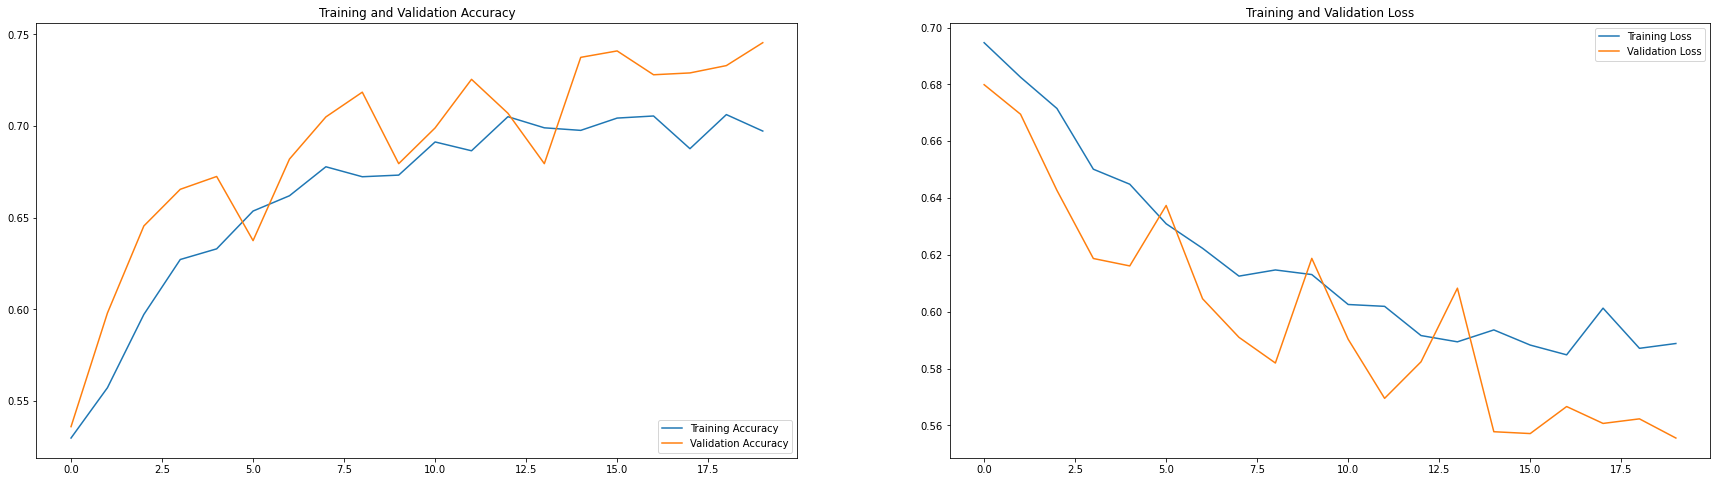

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

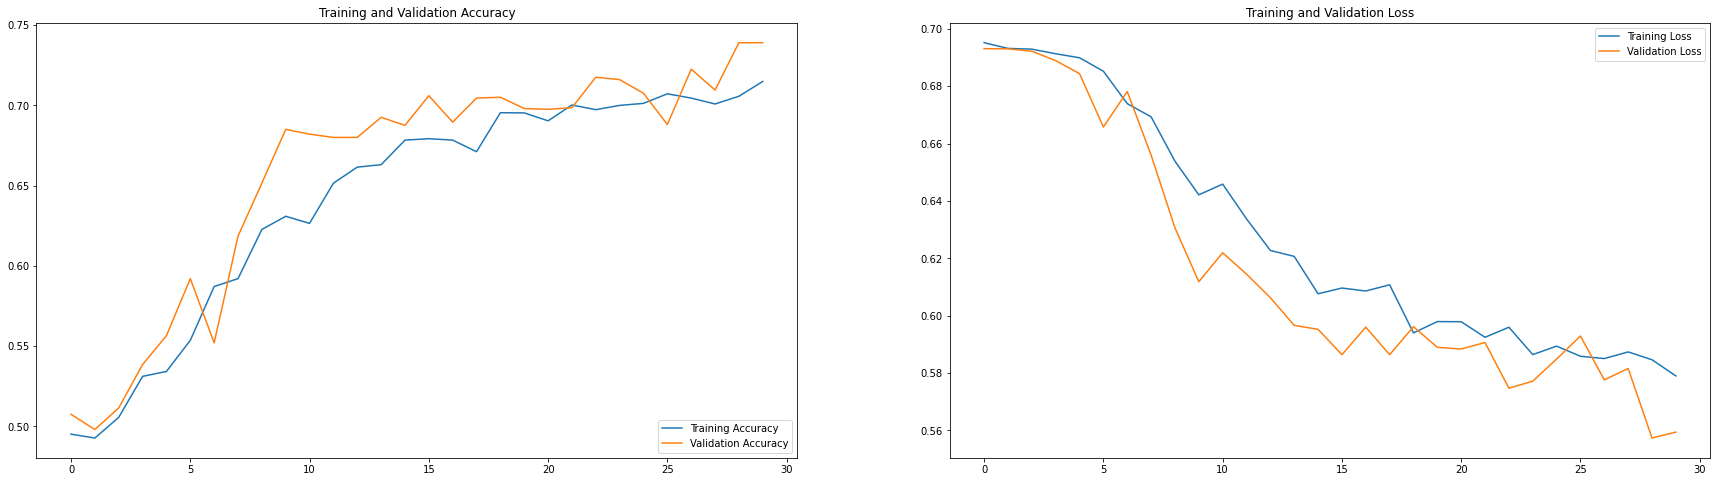

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()